<a href="https://colab.research.google.com/github/anselmo-pitombeira/Notebooks/blob/master/exemplo_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo de aplicação da Análise de Variância. (Montgomery, Cap.13)

Um fabricante de papel utilizado na produção de sacolas de supermercado está interessado em aumentar a resistência à tração das sacolas. O setor de engenharia acredita que a resistência à tração é função da concentração de madeira de lei na polpa utilizada para a fabricação das sacolas.

Um time de engenheiros decide então investigar 4 níveis de concentração de madeira: 5%, 10%, 15% e 20%. Para cada nível de concentração,eles produziram 6 espécimes, totalizando 24 espécimes que terão sua resistência à tração testada em laboratório em ordem aleatória.


In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leitura de dados:

In [3]:
dados = pd.read_excel('Dados_Exemplo_ANOVA.xlsx')
print(dados)

   Concentracao  Resistencia
0             A            7
1             A            8
2             A           15
3             A           11
4             A            9
5             A           10
6             B           12
7             B           17
8             B           13
9             B           18
10            B           19
11            B           15
12            C           14
13            C           18
14            C           19
15            C           17
16            C           16
17            C           18
18            D           19
19            D           25
20            D           22
21            D           23
22            D           18
23            D           20


Estatísticas descritivas:

In [14]:
dados.groupby("Concentracao").describe()

Resistencia                                                     
                   count       mean       std   min    25%   50%    75%   max
Concentracao                                                                 
A                    6.0  10.000000  2.828427   7.0   8.25   9.5  10.75  15.0
B                    6.0  15.666667  2.804758  12.0  13.50  16.0  17.75  19.0
C                    6.0  17.000000  1.788854  14.0  16.25  17.5  18.00  19.0
D                    6.0  21.166667  2.639444  18.0  19.25  21.0  22.75  25.0

Visualizando um boxplot agrupado por concentração.

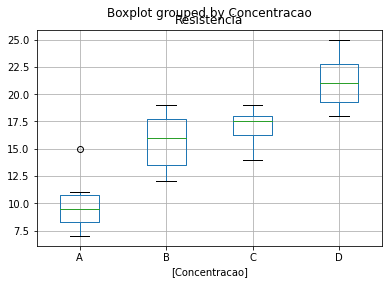

In [9]:
dados.boxplot(by="Concentracao")

Construção do modelo linear. Note o uso do objeto *ols* que criará o modelo Resistência = f(Concentração). O uso da letra C indica que a concentração é uma variável categórica.

In [4]:
modelo = ols("Resistencia ~ C(Concentracao)", data=dados)

Ajuste do modelo:

In [5]:
resultados = modelo.fit()

Criação da tabela ANOVA:

In [6]:
tabela = sm.stats.anova_lm(resultados)
print(tabela)

                   df      sum_sq     mean_sq          F    PR(>F)
C(Concentracao)   3.0  382.791667  127.597222  19.605207  0.000004
Residual         20.0  130.166667    6.508333        NaN       NaN


Note que a estatística F = 19.6, com valor-p igual a 0.000004, ou seja rejeita a hipótese nula aos níveis de significância 5% ou 1% (de fato, em qualquer nível maior que o valor-p).